In [1]:
import os 
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq

os.environ["GROQ_API_KEY"]= os.getenv("Groq_API_Key")

groq_llm=ChatGroq(model="qwen/qwen3-32b")

result=groq_llm.invoke("Hello")

result

AIMessage(content='<think>\nOkay, the user just said "Hello". That\'s pretty straightforward. I need to respond in a friendly and welcoming manner. Let me think about the best way to reply.\n\nFirst, I should acknowledge their greeting. Maybe say "Hello" back. Then, offer help since that\'s what the assistant does. Ask if there\'s something specific they need assistance with. Keep it simple and open-ended. Let me check for any nuances. They might be starting a conversation, so being approachable is key. Avoid any jargon or complicated language. Just a basic, warm response. Alright, that should work.\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 138, 'prompt_tokens': 9, 'total_tokens': 147, 'completion_time': 0.288840762, 'prompt_time': 0.000279034, 'queue_time': 0.211718531, 'total_time': 0.289119796}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'f

In [3]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image,display

## Graph State

class State(TypedDict):
    topic:str
    story:str
    improved_story:str
    final_story:str


## Nodes

def generate_story(state:State):
    msg=groq_llm.invoke(f"Write a one sentence story about the {state["topic"]}")
    return {"story":msg.content}

def check_conflict(state:State):
    if "?" in state["story"] or "!" in state["story"]:
        return "Fail"
    return "Pass"

def improved_story(state:State):
    msg=groq_llm.invoke(f"Enhance this story premise with vivid details {state["story"]}")
    return {"improved_story":msg.content}

def polished_story(state:State):
    msg=groq_llm.invoke(f"Add an unexpected twist to this story premise: {state["improved_story"]}")
    return {"final_story":msg.content}

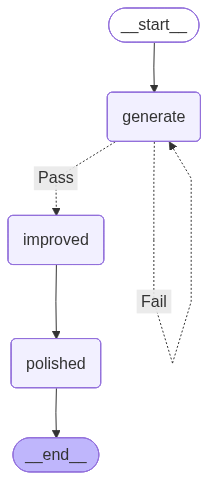

In [5]:
## Building the Graph

graph=StateGraph(State)
graph.add_node("generate",generate_story)
graph.add_node("improved",improved_story)
graph.add_node("polished",polished_story)

# Define the edges

graph.add_edge(START,"generate")
graph.add_conditional_edges("generate",check_conflict,{"Pass":"improved","Fail":"generate"})
graph.add_edge("improved","polished")
graph.add_edge("polished",END)

## compile the graph

compiled_graph=graph.compile()

## visualize the graph
graph_image=compiled_graph.get_graph().draw_mermaid_png()
display(Image(graph_image))

In [6]:
# run the graph

state={"topic":"Space exploration"}
result=compiled_graph.invoke(state)
result

{'topic': 'Space exploration',
 'story': '<think>\nOkay, the user wants a one-sentence story about space exploration. Let me start by thinking about the key elements of space exploration. There\'s the sense of wonder, the vastness of space, maybe some technology like rockets or rovers. Also, themes like discovery, human curiosity, or the search for extraterrestrial life.\n\nI should make it concise but vivid. Maybe start with a spacecraft or a specific mission. Use imagery related to stars, planets, or galaxies. Perhaps include a human element, like an astronaut or scientists on Earth. Need to convey emotion or a sense of achievement. Maybe mention a milestone, like reaching a new planet or finding something significant. Avoid being too technical. Make it accessible and inspiring. Let me try combining these ideas into a single sentence. Let\'s see... Maybe something like, "The rover, sent from Earth, discovered ancient water trails on Mars, igniting hope for past life beyond our planet